---
<center>

  # **Tarea 04**

**Realizado Por:**

   Samuel Huertas Rojas

---
</center>

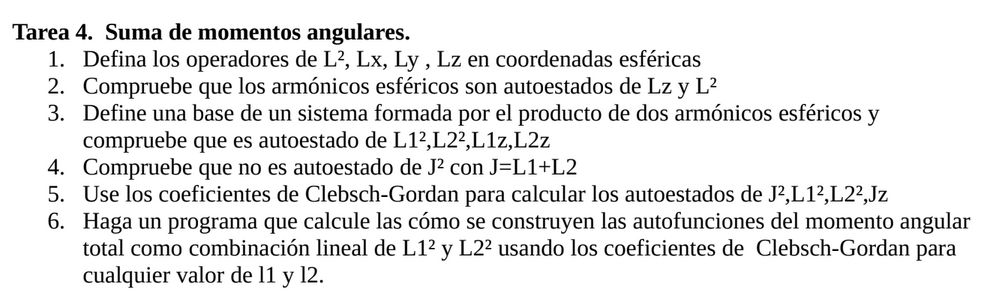

In [1]:
# Libreriras a importar
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from sympy.functions.special.spherical_harmonics import Ynm
from sympy import cos, sin, exp

# 1.

Definición de los operadores $L^2, L_x, L_y, L_z$  en coordenadas esfericas

In [2]:
hbar = sp.symbols("hbar", real=True, positive=True)

# Definición de los simbolos a utilizar en las coordenadas esfericas
r, theta, phi = sp.symbols("r theta phi", real=True)

In [3]:
# Definición de los operadores del momento angular
def Lx(f):
    return (
        1j
        * hbar
        * (
            sp.sin(phi) * sp.diff(f, theta)
            + sp.cot(theta) * sp.cos(phi) * sp.diff(f, phi)
        )
    )


def Ly(f):
    return (
        1j
        * hbar
        * (
            -sp.cos(phi) * sp.diff(f, theta)
            + sp.cot(theta) * sp.sin(phi) * sp.diff(f, phi)
        )
    )


def Lz(f):
    return -1j * hbar * sp.diff(f, phi)


def L2(f):
    return -(hbar**2) * (
        1 / sp.sin(theta) * sp.diff(sp.sin(theta) * sp.diff(f, theta), theta)
        + 1 / sp.sin(theta) ** 2 * sp.diff(f, phi, 2)
    )


# 2.
Comprobación que los armonicos esfericos son autoestados de $L_z$ y $L^2$

Definiendo a los armonicos esfericos como: 
$$
Y_\ell^m(\theta, \varphi) =
\sqrt{\frac{(2\ell + 1)(\ell + |m|)!}{4 \pi(\ell - |m|)!}}
\, P_\ell^m(\cos\theta)\, e^{i m \varphi}
$$

In [4]:
# Podemos obtener los armonicos esfericos podemos sacarlos desde la libreria sympy
def armonicos_esfericos(l, m, con_sympy= True):  # noqa: E741
    if con_sympy:
        return Ynm(l, m, theta, phi)
    else:
        termino1 = (
            (2 * l + 1) * sp.factorial(l + sp.Abs(m)) / ((4 * sp.pi) * sp.factorial(l - sp.Abs(m)))
        ) ** 0.5
        P_lm = sp.functions.special.polynomials.assoc_legendre(l, m, cos(theta))
        termino2 = P_lm * exp(1j * m * phi)
        return termino1 * termino2


# Mostrar la expresion simbolica del armonico esferico
def mostrar_armonico_simbolico(l, m):  # noqa: E741
    """
    Muestra la expresión simbólica del armónico esférico
    """
    Y = armonicos_esfericos(l, m)

    print(f"\n{'=' * 60}")
    print(f"Armónico Esférico Y_{l}^{m}(θ, φ)")
    print(f"{'=' * 60}")
    print("\nForma compacta:")
    sp.pprint(Y)
    print("\nForma numerica:")
    sp.pprint(sp.simplify(Y))

    return Y


# Ejemplo 1: l=0, m=0 (orbital s)
mostrar_armonico_simbolico(0, 0)



Armónico Esférico Y_0^0(θ, φ)

Forma compacta:
Ynm(0, 0, θ, φ)

Forma numerica:
Ynm(0, 0, θ, φ)


Ynm(0, 0, theta, phi)

Para comprobar que los armónicos esféricos son auto estados de los operadores $L_z$ y $L^2$, se debe de cumplir que:

* $\hat{L}^2 Y_\ell^m(\theta, \varphi) = \hbar^2 l(l+1) Y_\ell^m(\theta, \varphi)$

* $\hat{L}_z Y_\ell^m(\theta, \varphi) = m \hbar Y_\ell^m(\theta, \varphi)$

In [5]:
# Valores de l y m para los armónicos esféricos
l, m = sp.symbols("l m", integer=True)  # noqa: E741

# COmprobar que los armonicos esfericos son autoestados de los operadores L^2 y L_z

Y = armonicos_esfericos(l, m)
Y

Ynm(l, m, theta, phi)

In [6]:
# Verificacion de que el armonico esferico es autoestado de L_z
Lz(Y)

1.0*hbar*m*Ynm(l, m, theta, phi)

In [7]:
# Verificación de que el armonico esferico es autoestado de L2
L2(Y).simplify()

hbar**2*(m**2*exp(2*I*phi)*Ynm(l, m, theta, phi) - 2*m*sqrt(l**2 + l - m**2 - m)*exp(I*phi)*Ynm(l, m + 1, theta, phi)/tan(theta) + m*exp(2*I*phi)*Ynm(l, m, theta, phi) - sqrt(l**2 + l - m**2 - m)*sqrt(l**2 + l - m**2 - 3*m - 2)*Ynm(l, m + 2, theta, phi) - 2*sqrt(l**2 + l - m**2 - m)*exp(I*phi)*Ynm(l, m + 1, theta, phi)/tan(theta))*exp(-2*I*phi)

In [16]:
# Como es dificl ver los resultados de forma simbolico, se va a dar un ejemplo numerico
l_val = 2
m_val = 2
Y_num = Y.subs({l: l_val, m: m_val})

L2(Y_num).simplify()

6*hbar**2*Ynm(2, 2, theta, phi)

# 3.

Define una base de un sistema formada por el producto de dos armónicos esféricos y
compruebe que es autoestado de $L_1^2, L_2^2, L_{1z},L_{2z}$